# Introducción a Julia

## ¿Por qué Julia?

Julia es un lenguaje de código abierto, dinámico y de alto rendimiento. Al aprovechar un diseño inteligente en torno a un compilador just in time (JIT), Julia logra combinar la velocidad de lenguajes como C o Fortran con la facilidad de uso de Matlab o Python.

Aquí expondremos los aspectos básicos de Julia, pero siempre puede recurrir a la documentacón oficial de Julia. Como también a los siguientes links de interés:
* [Documentación](https://docs.julialang.org/en/v1/)
* [Tutorial por Martín Maas](https://www.matecdev.com/posts/julia-tutorial-science-engineering.html)
* [MATLAB--Python--Julia cheatsheet](https://cheatsheets.quantecon.org/index.html)

>**Ventajas**
>* *Sintaxis intuitiva y flexible:* Julia fue diseñado para ser fácil de usar y potente al mismo tiempo. Julia proporciona una sintaxis muy intuitiva y admite muchos conceptos útiles de otros lenguajes, como los generadores de Python.
>* *Rendimiento:* dado que Julia es un lenguaje compilado, el código en Julia es generalmente más rápido que el código escrito en Python o Matlab puro.
>* *Multiple Dispatch*: Significa que una función consta de múltiples métodos que pueden diferir en la cantidad de argumentos de entrada o su tipo. Cuando se llama a una función, se ejecuta la definición de método más específica que coincida con el número y los tipos de argumento. Esto permite definir funciones generales, en lugar de usar nombres de funciones específicas.

>**Desventajas**
>* *Número limitado de paquetes:* aunque Julia crece rápidamente y hay muchos paquetes, no puede competir con la cantidad de paquetes disponibles en Python o R. Sin embargo, Julia proporciona una forma sencilla de interactuar con otros lenguajes. Si no hay un paquete adecuado en Julia, es posible utilizar paquetes de otros idiomas.
>* *Primera ejecución lenta:* dado que Julia usa compilación just in time, la primera llamada de cada función es más lenta debido a la compilación. Esta desaceleración puede ser significativa si se llaman varias funciones por primera vez. Esto incluye la creación de un gráfico en una nueva sesión de Julia porque los paquetes para trazar son grandes y utilizan muchas funciones. El resultado es mucho tiempo hasta el primer gráfico (~20 s con Plots.jl)

### Sintaxis intuitiva y flexible
Julia proporciona una sintaxis muy intuitiva y flexible, que permite a los usuarios escribir funciones relativamente complicadas de una manera sencilla y legible. Como ejemplo, podemos comparar la definición de la función que calcula el número de Fibonacci. Una implementación en Matlab de esta función podría ser:
```Matlab
function f = fib(n)
    if n < 2
        f = n;
    else
        f = fib(n-1) + fib(n-2);
    end
end
```

Mientras que en Python podría ser
```python
def fib(n):
    return n if n<2 else fib(n-1) + fib(n-2)
```
En Julia esta sintaxis puede ser más simple:

In [1]:
fib(n::Int) = n < 2 ? n : fib(n-1) + fib(n-2)

fib (generic function with 1 method)

Al mismo tiempo, es posible utilizar la sintaxis tradicional de declaración de funciones multilínea.
```julia
function fib(n::Int)
    if n < 2
        return n
    else
        return fib(n-1) + fib(n-2)
    end
end
```

La anotación del tipo de argumento de entrada y la palabra clave de retorno son opcionales y ambas pueden omitirse. Por lo tanto, Julia admite diferentes sintaxis para definir funciones. Esto es muy útil porque es posible escribir funciones simples en una línea o usar una sintaxis multilínea para funciones más complicadas. Además, los autores de Julia se inspiraron en otros idiomas y Julia proporciona muchas funciones útiles conocidas en otros idiomas:
* La sintaxis de las operaciones matriciales está inspirada en Matlab.
* Los paquetes estadísticos utilizan una sintaxis similar a la de los paquetes R.
* Es posible utilizar generadores y listas por comprensión como en Python.

### Performance
Una de las ventajas más obvias de Julia es su velocidad. Dado que Julia utiliza la compilación just in time, es posible lograr el rendimiento de C sin utilizar ningún truco o paquete especial. Se puede encontrar ejemplos de esto en [Julia Micro-Benchmarks](https://julialang.org/benchmarks/) o [aquí](https://www.matecdev.com/posts/julia-performance-checklist.html).

[performance en Python](https://colab.research.google.com/drive/1AQAoprkDxJtY08wDXRQ8fPXbIgF-klt3?usp=sharing)


In [1]:
using BenchmarkTools, LinearAlgebra, Random, Plots

In [2]:
function estimate_pi(n)
    n_circle = 0
    for i in 1:n
        x = 2*rand() - 1
        y = 2*rand() - 1
        if sqrt(x^2 + y^2) <= 1
           n_circle += 1
        end
    end
    return 4*n_circle/n
end

estimate_pi (generic function with 1 method)

In [3]:
n=1000000
@time estimate_pi(n)


  0.048389 seconds (10.93 k allocations: 705.625 KiB, 86.88% compilation time)


3.141864

In [4]:
@benchmark estimate_pi(n)

BenchmarkTools.Trial: 978 samples with 1 evaluation.
 Range (min … max):  4.792 ms …   7.671 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     4.911 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   5.087 ms ± 353.456 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▄█▅▄▃▃▃▁   ▁ ▁▁▁▁ ▂▁ ▂▁ ▁ ▁  ▁                               
  ████████████▇████████████▇████▇▆▆▆▆▇▇▅▆▅▅▅▅▅▅▅▁▅▅▅▄▄▅▅▆▁▄▁▄ █
  4.79 ms      Histogram: log(frequency) by time      6.27 ms <

 Memory estimate: 16 bytes, allocs estimate: 1.

## Instalación
Julia se puede instalar desde la [página oficial](https://julialang.org/). 

Es posible escribir códigos Julia en cualquier editor de texto y ejecutarlos directamente desde la terminal. Sin embargo, normalmente es mejor utilizar un IDE que proporcione funciones adicionales, como resaltado de sintaxis o sugerencias de código. Por ejemplo podemos usar Visual Studio Code, un editor de código fuente gratuito creado por Microsoft. Admite muchos lenguajes de programación (Julia, Python, LaTex,...) mediante extensiones. El editor está disponible en la [página oficial](https://code.visualstudio.com/download).

## Instalación de paquetes

Julia proporciona una gran biblioteca de paquetes. Para agregar un paquete, desde el REPL introducimos un `]` e instalamos un paquete con la palabra clave agregar.
```julia
pkg> add Plots
```
o
```julia
julia> using Pkg
julia> Pkg.add("Plots")
```
Algunos paquetes ya vienen con Julia pero tanto estos como los que instalemos antes debemos cargarlos para poder usarlos.


In [5]:
using Random: seed!
B = [1 2 3;0 1 0;2 2 1]
#det(B)
#inv(B)
#seed!(1234)
#rand(2)

3×3 Matrix{Int64}:
 1  2  3
 0  1  0
 2  2  1

## Arrays

La forma más conveniente de ingresar una matriz es usar columnas separadas por espacios en blanco y punto y coma para las filas, de la siguiente manera


In [10]:
A = [1 2 3; 1 2 4; 2 2 2] 

3×3 Matrix{Int64}:
 1  2  3
 1  2  4
 2  2  2

In [11]:
A = [1 2 3; 
     1 2 4; 
     2 2 2] 

3×3 Matrix{Int64}:
 1  2  3
 1  2  4
 2  2  2

En cuanto a la entrada de vectores, cada elemento se puede separar mediante comas o punto y coma. Sin embargo, tenga en cuenta que separar las entradas con espacios en blanco dará como resultado una matriz de 1x3, que para Julia es un tipo de entidad diferente a un vector.


In [15]:
b1 = [4.0, 5, 6] 
#b2 = [4.0; 5; 6] 
#m1 = [4.0 5 6]   

3-element Vector{Float64}:
 4.0
 5.0
 6.0

Julia también admite matrices de tipos no numéricos como Cadenas, o incluso matrices de Cualquiera, que podrían incluir cadenas y números, y se pueden inicializar como:


In [16]:
C = ["Hello", 1, 2, 3]

4-element Vector{Any}:
  "Hello"
 1
 2
 3

Una forma muy concisa de inicializar y formar matrices es recurrir a las llamadas comprensiones de matrices.

In [ ]:
v = [1/n^2 for n=1:100000]

Si queremos inicializar una matriz por ejemplo, por motivos de rendimiento, es aconsejable inicializar matrices de un tipo (y tamaño) determinado, sin especificar ningún valor. Es decir, ni siquiera inicializar una nueva matriz con ceros.

Lo que sucede cuando declaramos una matriz `undef` es que una cierta porción de memoria se reserva (o asigna) para este uso específico. Como el ordenador ni siquiera llena esa porción de memoria con ceros, estamos ahorrando algo de tiempo.

```julia
n = 5
A1 = Array{Float64}(undef,n,n)          # 5×5 Matrix{Float64}
A2 = Matrix{Float64}(undef,n,n)         # 5×5 Matrix{Float64}

V1 = Array{Float64}(undef,n)            # 5-element Vector{Float64}
V2 = Vector{Float64}(undef,n)           # 5-element Vector{Float64}
```

In [18]:
A2 = Matrix{Float64}(undef,5,5)

5×5 Matrix{Float64}:
 6.94055e-310  6.94055e-310  6.94055e-310  2.0e-323      6.94055e-310
 6.94055e-310  6.94061e-310  6.94055e-310  6.94055e-310  5.0e-324
 6.9406e-310   6.94061e-310  6.94061e-310  6.9406e-310   1.56065e-319
 6.94055e-310  6.94061e-310  6.94061e-310  6.94061e-310  6.94061e-310
 6.94055e-310  6.94055e-310  1.56065e-319  6.94061e-310  6.94055e-310

Por otras razones, podriamos necesitar matrices o vectores vacios.

In [6]:
v1 = Array{Float64}(undef,0) #o v = Float64[] 
#Ojo con v1=[]

Float64[]

Para indexar arreglos hacemos lo siguiente:

In [7]:
D=rand(4,4)
D[1,2] #o D[1:2,3:4] o D[ D .< 0.5 ] .= 0

0.13309258948495895

In [8]:
for i ∈ 1:size(D,1), j ∈ 1:size(D,2)
    println(string("i=$(i) j=$(j) D[i,j]=$(D[i,j])"))
 end
 

i=1 j=1 D[i,j]=0.5495610810405088
i=1 j=2 D[i,j]=0.13309258948495895
i=1 j=3 D[i,j]=0.1220484800780196
i=1 j=4 D[i,j]=0.660895935437208
i=2 j=1 D[i,j]=0.09296647948686476
i=2 j=2 D[i,j]=0.8607292243641934
i=2 j=3 D[i,j]=0.2974116321546729
i=2 j=4 D[i,j]=0.754004928976128
i=3 j=1 D[i,j]=0.931753954083236
i=3 j=2 D[i,j]=0.7525816594627648
i=3 j=3 D[i,j]=0.8061902893746902
i=3 j=4 D[i,j]=0.18193814263017039
i=4 j=1 D[i,j]=0.31924396095881036
i=4 j=2 D[i,j]=0.9984711345269903
i=4 j=3 D[i,j]=0.46630590049595055
i=4 j=4 D[i,j]=0.29214254134701634


Ahora si queremos operar con vectores y matrices:

In [9]:
x = rand(100)
y = rand(100)
z=dot(x,y) #o x'y

26.982889739779544

In [10]:
E=rand(2,2)
E*[1,0]
E*E' #Si quiero escalar contra escalar hago *.

2×2 Matrix{Float64}:
 0.977091  0.376149
 0.376149  0.146695

Para resolver sistemas usamos la notación estilo MATLAB

```julia
b1 = [4.0, 5, 6]                # 3-element Vector{Float64}
b2 = [4.0; 5; 6]                # 3-element Vector{Float64}
m1 = [4.0 5 6]                  # 1×3 Matrix{Float64}

x=A\b1                          # Solves A*x=b
x=A\b2                          # Solves A*x=b  
x=A\m1                          # Error!!
```

Finalmente, otra operación clave es la de concatenar arreglos

In [11]:
F = [4 5 6] 
G = [6 7 8]
vcat(F,G)
#hcat(F,G)
#[F;G]
#[F G]

2×3 Matrix{Int64}:
 4  5  6
 6  7  8

## Funciones

Supongamos que quiero implementar una función que devuelva la aproximación de la serie geométrica de razón r: 

$$geom(r) = \sum_{n=1}^\infty r^n$$


In [12]:
function geom(r,n)
	res = 0
	for k in 1:1:n
		res = res + r^k
		#println(k)
	end
	return res
end

geom (generic function with 1 method)

In [13]:
geom(0.4,12.9) #o println(geom(0.5,100))


0.6666554818560002

In [14]:
function geom2(r,n::Int)
	res = 0
	for k in 1:1:n
		res = res + r^k
		#println(k)
	end
	return res
end

geom2 (generic function with 1 method)

In [15]:
geom2(0.4,12)


0.6666554818560002

In [16]:
function geom3(r;n=12)
	res = 0
	for k in 1:1:n
		res = res + r^k
		#println(k)
	end
	return res
end

geom3 (generic function with 1 method)

In [17]:
geom3(0.4,n=19)

0.6666666483414732

In [18]:
geom4(r;n=10) = sum(r^k for k=1:n)

geom4 (generic function with 1 method)

In [19]:
geom3(0.4)

0.6666554818560002

Algo que nos puede ser de utilidad es querer aplicar una función a un vector, por ejemplo:

In [ ]:
r=rand(3)
geom3(r)
#geom3.(r)

### Multiple Dispatch

Una de las características más distintivas de Julia se llama Multiple Distpach. En pocas palabras, es la posibilidad de tener funciones genéricas con múltiples métodos asociados, cada uno para una combinación diferente de tipos de argumentos.


In [21]:
function f(v::Vector)
	x=v[1]
	y=v[2]
	return x*y
end

f (generic function with 1 method)

In [22]:
function f(x::Real,y::Real)
	return x*y
end

f (generic function with 2 methods)

In [23]:
f([4,3])
f(3,4)

12

In [24]:
g(x::Real) = x + 1
g(x::String) = repeat(x, 4)

g (generic function with 2 methods)

In [25]:
g(4.1)
g("a")

"aaaa"

## Plots

El paquete [Plots](https://docs.juliaplots.org/stable/) no es un paquete de trazado estándar conocido en otros lenguajes. El paquete Plots proporciona una interfaz unificada y un conjunto de herramientas para crear gráficos.

En comparación con Python o Matlab, se necesita algo de tiempo para crear el primer gráfico en una nueva sesión de Julia. En Julia, todas las funciones se compilan durante su primera ejecución, lo que ralentiza la primera ejecución.

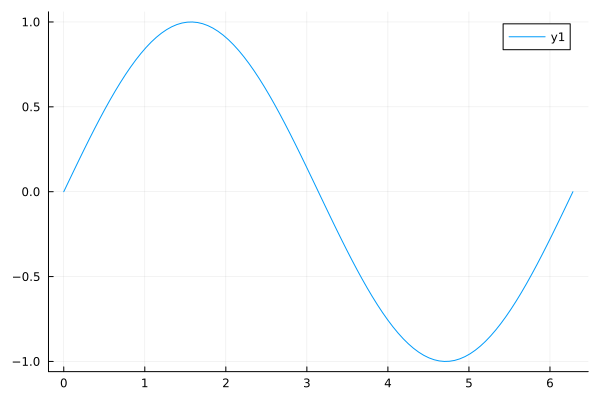

In [26]:
a = range(0, 2π; length = 100)
b = sin.(a)
plot(a, b)

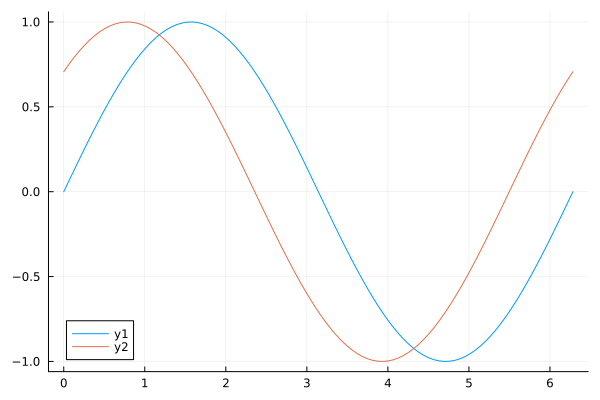

In [27]:
plot!(a, sin.(a .+ π/4))

Algunos atributos:
- label: nombre de cada grafico que aparecera en la leyenda.
- xguide, yguide: nombre de los ejes.
- legend: posicion de la leyenda.
- title: titulo del plot.
- color: series color (ver documentación).
- linestyle: estilo de la linea.
- linewidth: tamaño de la linea.

In [28]:
x1=0:0.01:1
x2=x1
s(a,b)=a^2+b^2

s (generic function with 1 method)

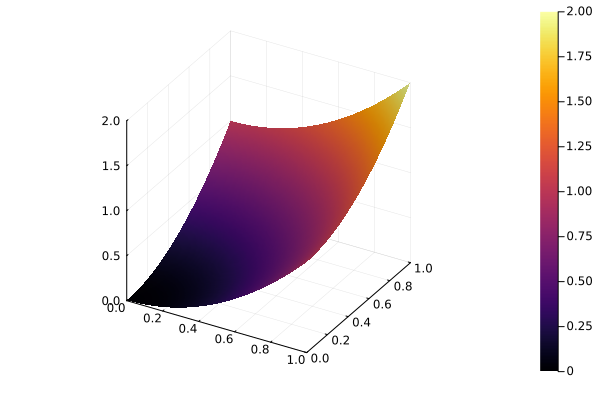

In [29]:
surface(x1, x2, s)

In [ ]:
plotly()
surface(x1, x2, s)
#esto en jupyter no funciona, pero en el editor podran ver que el plot es mucho mejor esteticamente
# y pueden realizar distintas acciones como rotar, hacer zoom, etc

## Estructura de Datos

En Julia, la palabra clave `struct` define un nuevo tipo compuesto, basado en nombres de campo dados y, opcionalmente, tipos individuales.

De forma predeterminada, las estructuras no se pueden modificar una vez inicializadas (es decir, son inmutables a menos que se definan explícitamente como una `mutable struct`)


In [31]:
struct Estudiante
    nombre::String
    edad::Int
    carrera::String
	promedio::Float64
end


Para inicializar una estructura con valores, el constructor predeterminado simplemente usa el nombre de la estructura como lo haría con una función:


In [32]:
estudiante1 = Estudiante("Juan",27,"Matematica",9.3)

Estudiante("Juan", 27, "Matematica", 9.3)

In [33]:
estudiante1.nombre
#estudiante1.promedio

"Juan"

In [34]:
mutable struct mEstudiante
    nombre::String
    edad::Int
    carrera::String
	promedio::Float64
end

In [35]:
estudiante2 = mEstudiante("Pedro",26,"Datos",9.1)

mEstudiante("Pedro", 26, "Datos", 9.1)

In [36]:
estudiante1.promedio = 9.5
estudiante2.promedio = 9.5
estudiante2

ErrorException: setfield!: immutable struct of type Estudiante cannot be changed